# 1a. What is the rate of re-referral?

## 16.26%

# How many children have multiple referrals by POE?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle

%matplotlib inline

In [2]:

# reading a pickle file
with open('../data/teis_final_data.pickle', 'rb') as file:
    final_data = pickle.load(file)

In [3]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115523 entries, 0 to 115523
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype          
---  ------                     --------------   -----          
 0   Child ID                   115523 non-null  int64          
 1   DOB                        115523 non-null  datetime64[ns] 
 2   Notification Date          115523 non-null  datetime64[ns] 
 3   Referral Age               115523 non-null  timedelta64[ns]
 4   Referral Source Type Name  115523 non-null  object         
 5   Child Phase                115523 non-null  object         
 6   Exit Reason                96176 non-null   object         
 7   Exit Date                  85193 non-null   datetime64[ns] 
 8   Exit Age                   85193 non-null   timedelta64[ns]
 9   Service Coordinator        115522 non-null  object         
 10  Parent Consent             75364 non-null   datetime64[ns] 
 11  Initial Eligibility        71883 non-nu

In [4]:
final_data.nunique()

Child ID                     96742
DOB                           3202
Notification Date             1541
Referral Age                  1111
Referral Source Type Name       24
Child Phase                      6
Exit Reason                     16
Exit Date                     2163
Exit Age                      1112
Service Coordinator            426
Parent Consent                1895
Initial Eligibility              2
Initial Eligibility Date      1820
Initial IFSP Date             1570
Latest IFSP                   1538
Late Referral                    1
third_DOB                     3164
POE                              9
County Name                     95
County SES                       5
Tenn Region                      3
Fiscal Year                      6
Fiscal Year.1                    6
Notification Month              12
Qtr                              4
Notification Year                7
Active                           2
dtype: int64

In [5]:
final_data

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,POE,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active
0,104085,2007-07-07,2018-01-20,3850 days,DCS,Notification,Unable to contact,2010-01-25,933 days,NaN,...,GN,Davidson,Competitive,Middle,2017-2018,2017.0,Jan,3.0,2018,I
1,350065,2013-10-15,2016-08-17,1037 days,PCP,Screening,Unable to contact,2016-08-31,1051 days,Steven Scarlett,...,UC,Jackson,At-Risk,Middle,2016-2017,2016.0,Aug,1.0,2016,I
2,351755,2013-11-13,2016-07-12,972 days,Parent,Eligibility,Ineligible for Part C,2016-08-25,1016 days,Rene Bard,...,NW,Madison,Transitional,Western,2016-2017,2016.0,Jul,1.0,2016,I
3,353800,2013-10-01,2016-09-14,1079 days,Parent,Notification,Referral less than 45 days,2016-09-15,1080 days,Jennifer Terranera - 45 days,...,FT,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,UC,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2020-05-20,2022-07-01,772 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115520,531593,2021-12-07,2022-07-01,206 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A
115521,531594,2022-06-21,2022-07-01,10 days,Other Health Care Provider,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115522,531595,2022-06-17,2022-07-01,14 days,Hospital,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A


In [6]:
final_data.describe()

,Child ID,Referral Age,Exit Age,Late Referral,Fiscal Year.1,Qtr,Notification Year
count,115523.000000,115523,85193,2829.0,113256.000000,113256.000000,115523.000000
mean,464308.235451,468 days 04:18:56.189330256,679 days 23:48:38.479217768,1.0,2018.594211,2.502905,2019.157925
std,37698.523919,320 days 08:20:26.249299884,376 days 21:56:27.696157692,0.0,1.677470,1.118825,1.765911
min,104085.000000,0 days 00:00:00,0 days 00:00:00,1.0,2016.000000,1.000000,2016.000000
25%,430019.500000,138 days 00:00:00,340 days 00:00:00,1.0,2017.000000,1.000000,2018.000000
50%,465887.000000,503 days 00:00:00,763 days 00:00:00,1.0,2019.000000,3.000000,2019.000000
75%,496018.500000,742 days 00:00:00,1081 days 00:00:00,1.0,2020.000000,3.000000,2021.000000
max,531596.000000,3896 days 00:00:00,3897 days 00:00:00,1.0,2021.000000,4.000000,2022.000000


In [7]:
final_data.sort_values('Child ID')

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,POE,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active
0,104085,2007-07-07,2018-01-20,3850 days,DCS,Notification,Unable to contact,2010-01-25,933 days,NaN,...,GN,Davidson,Competitive,Middle,2017-2018,2017.0,Jan,3.0,2018,I
1,350065,2013-10-15,2016-08-17,1037 days,PCP,Screening,Unable to contact,2016-08-31,1051 days,Steven Scarlett,...,UC,Jackson,At-Risk,Middle,2016-2017,2016.0,Aug,1.0,2016,I
2,351755,2013-11-13,2016-07-12,972 days,Parent,Eligibility,Ineligible for Part C,2016-08-25,1016 days,Rene Bard,...,NW,Madison,Transitional,Western,2016-2017,2016.0,Jul,1.0,2016,I
3,353800,2013-10-01,2016-09-14,1079 days,Parent,Notification,Referral less than 45 days,2016-09-15,1080 days,Jennifer Terranera - 45 days,...,FT,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,UC,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2020-05-20,2022-07-01,772 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115520,531593,2021-12-07,2022-07-01,206 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A
115521,531594,2022-06-21,2022-07-01,10 days,Other Health Care Provider,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115522,531595,2022-06-17,2022-07-01,14 days,Hospital,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A


In [8]:
total_re_referrals = (final_data.duplicated(subset = 'Child ID', keep = 'first')).sum()
#total re-referrals
total_re_referrals

18781

In [9]:
re_referrals = final_data[final_data.duplicated(subset = 'Child ID')]
re_referrals

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,POE,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active
25,360966,2014-01-18,2017-01-12,1090 days,DCS,Notification,Referral less than 45 days,2017-01-17,1095 days,Cassidy Wilbanks,...,ET,Monroe,At-Risk,Eastern,2016-2017,2016.0,Jan,3.0,2017,I
27,361021,2014-02-17,2016-11-29,1016 days,Family and Friends,IFSP,618 - Part B eligible,2017-02-16,1095 days,Cathy Taylor,...,ET,Anderson,Transitional,Eastern,2016-2017,2016.0,Nov,2.0,2016,I
29,361038,2013-12-25,2016-08-26,975 days,DCS,Eligibility,Unable to contact,NaT,NaT,Mary Jane Ratliff,...,GN,Wilson,Competitive,Middle,2016-2017,2016.0,Aug,1.0,2016,NaN
31,361040,2014-01-22,2016-10-28,1010 days,Parent,IFSP,618 - Part B eligibility not determined,2017-01-21,1095 days,Brandi Mohr,...,ET,Roane,Transitional,Eastern,2016-2017,2016.0,Oct,2.0,2016,I
47,363098,2014-04-07,2016-09-29,906 days,DCS,IFSP,NaN,NaT,NaT,Jennifer Shope,...,SC,Marshall,Transitional,Middle,2016-2017,2016.0,Sep,1.0,2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113471,529200,2022-04-21,2022-06-21,61 days,Parent,Notification,NaN,NaT,NaT,Signal Centers-EEA,...,FT,Sullivan,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
113561,529303,2020-02-25,2022-06-17,843 days,Parent,Notification,NaN,NaT,NaT,Signal Centers-EEA,...,SE,Hamilton,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
113605,529365,2020-03-11,2022-06-28,839 days,Parent,Notification,NaN,NaT,NaT,Kim Correll,...,UC,Smith,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
113657,529416,2019-10-09,2022-05-26,960 days,Dept. of Health,Notification,Parent decline,NaT,NaT,Michael Chideckel Admin,...,GN,Davidson,Competitive,Middle,2021-2022,2021.0,May,4.0,2022,NaN


In [10]:
poe_reref= re_referrals.groupby(['POE'])['Child ID'].count()
poe_reref = poe_reref.to_frame().reset_index()
poe_reref = poe_reref.rename(columns = {'Child ID' : "Total Re-referrals"})
poe_reref

,POE,Total Re-referrals
0,ET,3420
1,FT,1869
2,GN,3513
3,MD,3236
4,NW,1114
5,SC,2198
6,SE,1107
7,SW,969
8,UC,1355


In [11]:
poe_ref = final_data.groupby(['POE'])['Child ID'].count()
poe_ref = poe_ref.to_frame().reset_index()
poe_ref = poe_ref.rename(columns = {'Child ID' : 'Total Referrals'})
poe_ref


,POE,Total Referrals
0,ET,20583
1,FT,11335
2,GN,20239
3,MD,17641
4,NW,6592
5,SC,14967
6,SE,8790
7,SW,6142
8,UC,9234


In [12]:
poe_rerate = pd.merge(poe_ref, poe_reref, how='left').fillna(0)
poe_rerate['Re-referral Rate'] = (poe_rerate['Total Re-referrals'] / poe_rerate['Total Referrals'])*100
poe_rerate


,POE,Total Referrals,Total Re-referrals,Re-referral Rate
0,ET,20583,3420,16.615654
1,FT,11335,1869,16.488752
2,GN,20239,3513,17.357577
3,MD,17641,3236,18.343631
4,NW,6592,1114,16.899272
5,SC,14967,2198,14.685642
6,SE,8790,1107,12.593857
7,SW,6142,969,15.776620
8,UC,9234,1355,14.674031


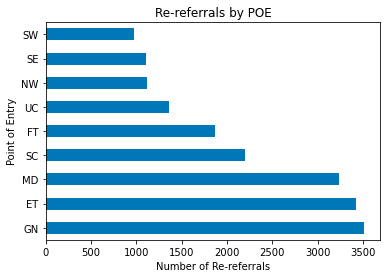

In [37]:
poe_reref.sort_values('Total Re-referrals', ascending = False, inplace = True)
poe_reref.plot(x= 'POE', y = 'Total Re-referrals', kind = 'barh', color = '#0077B6', legend = False)

plt.title("Re-referrals by POE")
plt.ylabel("Point of Entry")
plt.xlabel("Number of Re-referrals")
plt.savefig('poe_reref', transparent=True)

In [14]:
total_all_referrals = len(final_data)
total_all_referrals

115523

In [15]:
rate_of_referral = (total_re_referrals/total_all_referrals)*100
rate_of_referral

16.257368662517422

([<matplotlib.patches.Wedge at 0x2be00ab1040>,
 [Text(0.9955458324137622, 0.46785520790474233, ''),
  Text(-0.9955458324137622, -0.4678552079047424, '')])

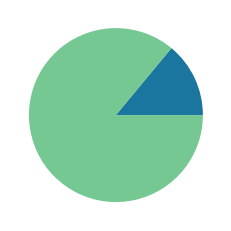

In [16]:
values = [18781, 115523 ]

colors = ( "#1A759F", "#76C893") 

plt.pie(values, radius = 1, colors=colors)
#plt.savefig('pie')

In [17]:
15641/96742 #children 

0.16167745136548758

In [18]:
final_data.sort_values('Child ID').nunique()

Child ID                     96742
DOB                           3202
Notification Date             1541
Referral Age                  1111
Referral Source Type Name       24
Child Phase                      6
Exit Reason                     16
Exit Date                     2163
Exit Age                      1112
Service Coordinator            426
Parent Consent                1895
Initial Eligibility              2
Initial Eligibility Date      1820
Initial IFSP Date             1570
Latest IFSP                   1538
Late Referral                    1
third_DOB                     3164
POE                              9
County Name                     95
County SES                       5
Tenn Region                      3
Fiscal Year                      6
Fiscal Year.1                    6
Notification Month              12
Qtr                              4
Notification Year                7
Active                           2
dtype: int64

In [19]:
final_data.columns = map(str.lower, final_data.columns)
final_data.columns = final_data.columns.str.replace(' ', '_')
final_data.columns = final_data.columns.str.replace('.', '_')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115523 entries, 0 to 115523
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype          
---  ------                     --------------   -----          
 0   child_id                   115523 non-null  int64          
 1   dob                        115523 non-null  datetime64[ns] 
 2   notification_date          115523 non-null  datetime64[ns] 
 3   referral_age               115523 non-null  timedelta64[ns]
 4   referral_source_type_name  115523 non-null  object         
 5   child_phase                115523 non-null  object         
 6   exit_reason                96176 non-null   object         
 7   exit_date                  85193 non-null   datetime64[ns] 
 8   exit_age                   85193 non-null   timedelta64[ns]
 9   service_coordinator        115522 non-null  object         
 10  parent_consent             75364 non-null   datetime64[ns] 
 11  initial_eligibility        71883 non-nu

C:\Users\zoete\AppData\Local\Temp\ipykernel_19124\4154436331.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_data.columns = final_data.columns.str.replace('.', '_')


In [20]:
no_dups = final_data.drop_duplicates(subset = ['child_id'])
no_dups

,child_id,dob,notification_date,referral_age,referral_source_type_name,child_phase,exit_reason,exit_date,exit_age,service_coordinator,...,poe,county_name,county_ses,tenn_region,fiscal_year,fiscal_year_1,notification_month,qtr,notification_year,active
0,104085,2007-07-07,2018-01-20,3850 days,DCS,Notification,Unable to contact,2010-01-25,933 days,NaN,...,GN,Davidson,Competitive,Middle,2017-2018,2017.0,Jan,3.0,2018,I
1,350065,2013-10-15,2016-08-17,1037 days,PCP,Screening,Unable to contact,2016-08-31,1051 days,Steven Scarlett,...,UC,Jackson,At-Risk,Middle,2016-2017,2016.0,Aug,1.0,2016,I
2,351755,2013-11-13,2016-07-12,972 days,Parent,Eligibility,Ineligible for Part C,2016-08-25,1016 days,Rene Bard,...,NW,Madison,Transitional,Western,2016-2017,2016.0,Jul,1.0,2016,I
3,353800,2013-10-01,2016-09-14,1079 days,Parent,Notification,Referral less than 45 days,2016-09-15,1080 days,Jennifer Terranera - 45 days,...,FT,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,UC,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2020-05-20,2022-07-01,772 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115520,531593,2021-12-07,2022-07-01,206 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A
115521,531594,2022-06-21,2022-07-01,10 days,Other Health Care Provider,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115522,531595,2022-06-17,2022-07-01,14 days,Hospital,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A


In [21]:
referral_by_poe = no_dups['child_id'].groupby(no_dups.poe).agg('count')
referral_by_poe

poe
ET    17163
FT     9466
GN    16726
MD    14405
NW     5478
SC    12769
SE     7683
SW     5173
UC     7879
Name: child_id, dtype: int64

In [22]:
no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96742 entries, 0 to 115523
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   child_id                   96742 non-null  int64          
 1   dob                        96742 non-null  datetime64[ns] 
 2   notification_date          96742 non-null  datetime64[ns] 
 3   referral_age               96742 non-null  timedelta64[ns]
 4   referral_source_type_name  96742 non-null  object         
 5   child_phase                96742 non-null  object         
 6   exit_reason                82887 non-null  object         
 7   exit_date                  78038 non-null  datetime64[ns] 
 8   exit_age                   78038 non-null  timedelta64[ns]
 9   service_coordinator        96741 non-null  object         
 10  parent_consent             66316 non-null  datetime64[ns] 
 11  initial_eligibility        63136 non-null  object    

In [23]:
referral_by_poe = pd.DataFrame(referral_by_poe)

In [24]:
referral_by_poe = referral_by_poe.reset_index()

In [25]:
referral_by_poe.rename(columns = {'poe':'poe'})
referral_by_poe.sort_values('child_id')

,poe,child_id
7,SW,5173
4,NW,5478
6,SE,7683
8,UC,7879
1,FT,9466
5,SC,12769
3,MD,14405
2,GN,16726
0,ET,17163


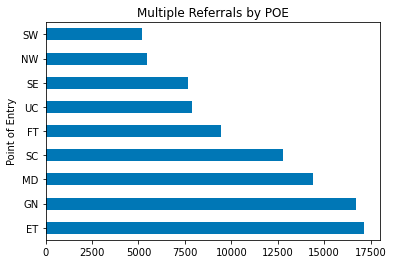

In [26]:
referral_by_poe.sort_values('child_id', ascending = False, inplace = True)
referral_by_poe.plot(x= 'poe', y = 'child_id', kind = 'barh', color = '#0077B6', legend = False)

plt.title("Multiple Referrals by POE")
plt.ylabel("Point of Entry");
plt.savefig("referral_by_poe", transparent = True)


In [27]:
referral_by_ses =  no_dups['child_id'].groupby([no_dups.poe, no_dups.county_ses]).agg('count')
referral_by_ses

poe  county_ses  
ET   At-Risk          2572
     Distressed        316
     Transitional    14275
FT   At-Risk          3160
     Distressed        834
     Transitional     5472
GN   At-Risk             2
     Attainment          4
     Competitive     11243
     Transitional     5477
MD   Competitive         1
     Distressed          1
     Transitional    14400
NW   At-Risk          1503
     Distressed        514
     Transitional     3461
SC   At-Risk           282
     Attainment       2369
     Competitive      4889
     Distressed         95
     Transitional     5134
SE   At-Risk           829
     Attainment          1
     Distressed        329
     Transitional     6524
SW   At-Risk          1848
     Transitional     3325
UC   At-Risk          1097
     Competitive      2878
     Distressed         87
     Transitional     3817
Name: child_id, dtype: int64

In [28]:
referral_by_ses = pd.DataFrame(referral_by_ses)
referral_by_ses = referral_by_ses.reset_index()
referral_by_ses

,poe,county_ses,child_id
0,ET,At-Risk,2572
1,ET,Distressed,316
2,ET,Transitional,14275
3,FT,At-Risk,3160
4,FT,Distressed,834
5,FT,Transitional,5472
6,GN,At-Risk,2
7,GN,Attainment,4
8,GN,Competitive,11243
9,GN,Transitional,5477


In [29]:
referral_by_ses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poe         31 non-null     object
 1   county_ses  31 non-null     object
 2   child_id    31 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 872.0+ bytes


In [30]:
referral_by_ses.sort_values('child_id', ascending= False)

,poe,county_ses,child_id
12,MD,Transitional,14400
2,ET,Transitional,14275
8,GN,Competitive,11243
24,SE,Transitional,6524
9,GN,Transitional,5477
5,FT,Transitional,5472
20,SC,Transitional,5134
18,SC,Competitive,4889
30,UC,Transitional,3817
15,NW,Transitional,3461


In [31]:
#plt.figure(figsize = (8, 6))
#plt.plot('county_ses', 'child_id')
#g= sns.FacetGrid(referral_by_ses, row= 'poe', hue = 'poe')
#g.map(sns.scatterplot, 'county_ses', 'child_id')
#sns.set(rc={"figure.figsize":(200, 240)}) #width=8, height=4
#plt.legend()

In [32]:
#my_list = ['ET']
#et = referral_by_ses.query('poe in @my_list')

In [33]:
#g= sns.FacetGrid(et, row= 'poe', hue = 'county_ses')
#g.map(sns.scatterplot, 'county_ses', 'child_id')
#sns.set(rc={"figure.figsize":(200, 240)}) #width=8, height=4
#plt.legend(loc= 'upper right', bbox_to_anchor= (2, 1))
#plt.set(yticklabel=[])

In [34]:
referral_by_poe.rename(columns = {'poe': "POE", "child_id":"Re-referral Count", "referral_percent":"Re-referral Percent"})
referral_by_poe

,poe,child_id
0,ET,17163
2,GN,16726
3,MD,14405
5,SC,12769
1,FT,9466
8,UC,7879
6,SE,7683
4,NW,5478
7,SW,5173


In [35]:
referral_by_poe['referral_percent'] = (referral_by_poe.child_id/115523)*100
referral_by_poe.rename(columns = {'poe': "POE", "child_id":"Re-referral Count", "referral_percent":"Re-referral Percent"})
referral_by_poe.round(2)

,poe,child_id,referral_percent
0,ET,17163,14.86
2,GN,16726,14.48
3,MD,14405,12.47
5,SC,12769,11.05
1,FT,9466,8.19
8,UC,7879,6.82
6,SE,7683,6.65
4,NW,5478,4.74
7,SW,5173,4.48


Text(0.5, 0, 'Percent')

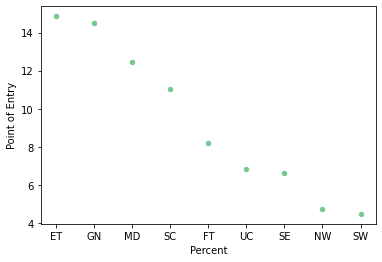

In [36]:
referral_by_poe.plot(x= 'poe', y = 'referral_percent', kind = 'scatter', color = '#76C893', legend = False)
#referral_by_poe.sort_values('referral_percent', inplace = True)
#plt.title("Percent of Re-referrals by POE")
plt.ylabel("Point of Entry")
plt.xlabel("Percent")
#plt.savefig("percent_re_referral_by_poe")


## Summary / Recomendations

- ET, GN, MD, SC have the most re-referrals
-add referral id that remains as constant as the child id to keep track of family relocation and constant record of past referrals
-theory to investigate: what is the county SES of POE's with higher rate of re-referrals
-rate of re-referral is the percentage of referrals that were re-referrals
-15,641 children with <1 referral
